In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df= pd.read_csv('dataset.csv')

In [4]:
df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
df.isnull().sum()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

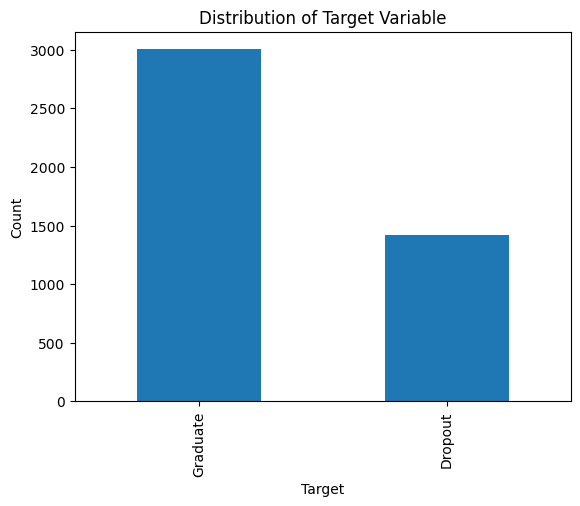

In [6]:
df['Target'] = df['Target'].replace('Enrolled', 'Graduate')
df['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [7]:
X = df.drop('Target', axis=1)
y = df['Target']


In [8]:
y = y.map({'Graduate': 1, 'Dropout': 0})


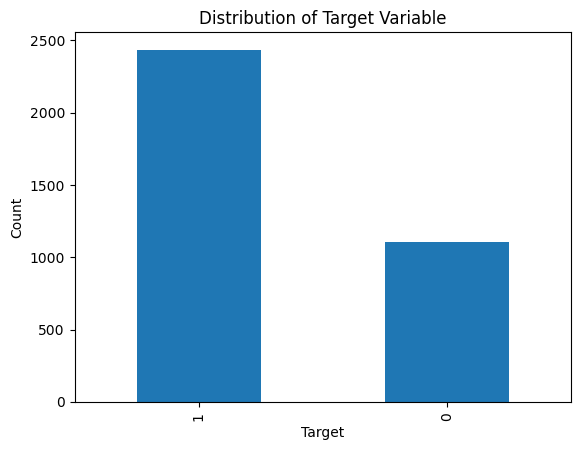

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

trainingdf=pd.DataFrame(y_train, columns=['Target'])
trainingdf['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [10]:
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.864406779661017
Confusion Matrix:
[[234  82]
 [ 38 531]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       316
           1       0.87      0.93      0.90       569

    accuracy                           0.86       885
   macro avg       0.86      0.84      0.85       885
weighted avg       0.86      0.86      0.86       885



In [11]:
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients)


                                                Coefficient  Abs_Coefficient
Tuition fees up to date                            2.278454         2.278454
International                                      1.318599         1.318599
Curricular units 2nd sem (approved)                0.647958         0.647958
Curricular units 2nd sem (enrolled)               -0.512696         0.512696
Debtor                                            -0.508078         0.508078
Scholarship holder                                 0.402793         0.402793
Curricular units 1st sem (approved)                0.331559         0.331559
Displaced                                         -0.318905         0.318905
Gender                                            -0.243713         0.243713
Curricular units 2nd sem (credited)               -0.238703         0.238703
Educational special needs                         -0.200556         0.200556
Curricular units 1st sem (credited)               -0.183135         0.183135

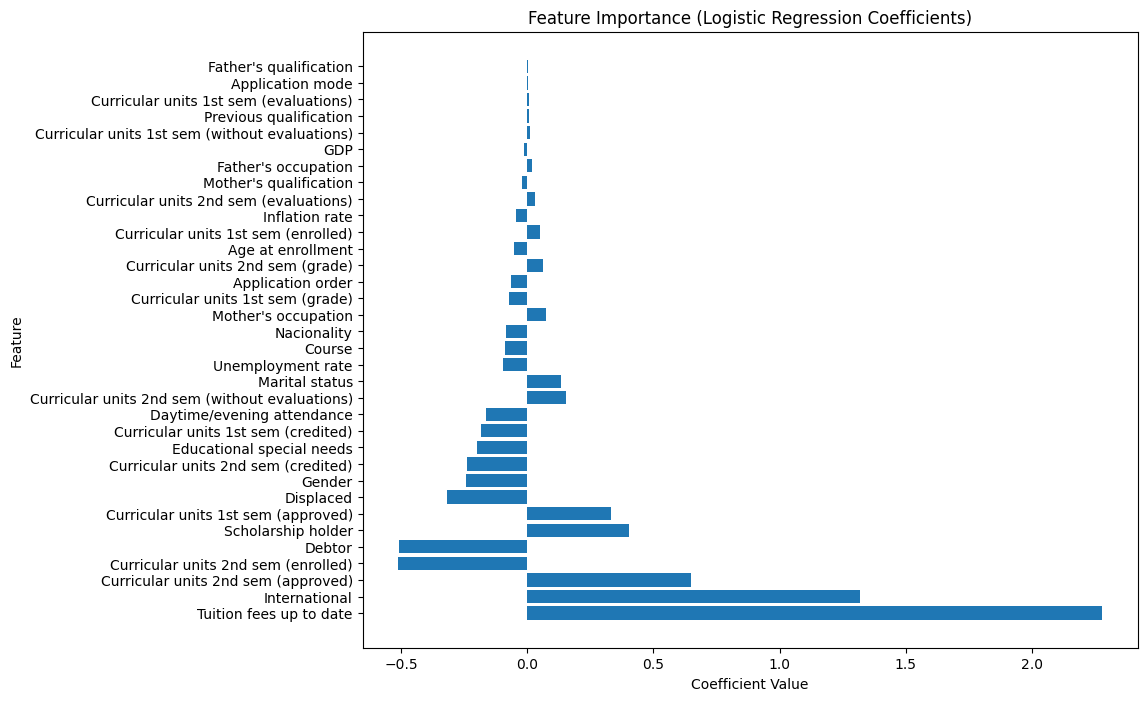

The three most important features are:
                                     Coefficient  Abs_Coefficient
Tuition fees up to date                 2.278454         2.278454
International                           1.318599         1.318599
Curricular units 2nd sem (approved)     0.647958         0.647958


In [12]:
plt.figure(figsize=(10, 8))
plt.barh(coefficients.index, coefficients['Coefficient'])
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

print("The three most important features are:")
print(coefficients.head(3))